# DeepSleep 
## v1

- board
- r (run duration)
- ds (deep sleep duration)
- TX (test version)

In [22]:
board="nodemcu"
r = 10
ds = 10
TX = 1

batteries = [0.8, 2, 4, 10] #Ah

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

filename = f"../data/dslp--{board}_r{r}_ds{ds}-T{TX}.csv"

df = pd.read_csv(filename, parse_dates=["read_at", "timestamp"])

df.columns = ['index','read_at', 'millis', "dt", "v", "a", "w", "v_sh"]
df

,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-02-28 14:32:00.666620,18165,2025-02-28 14:32:00,5.096,0.01,0.05096,0.001
1,1,2025-02-28 14:32:00.676277,18176,2025-02-28 14:32:00,5.096,0.01,0.05096,0.001
2,2,2025-02-28 14:32:00.688151,18187,2025-02-28 14:32:00,5.096,0.01,0.05096,0.001
3,3,2025-02-28 14:32:00.698533,18197,2025-02-28 14:32:00,5.096,0.01,0.05096,0.001
4,4,2025-02-28 14:32:00.710205,18209,2025-02-28 14:32:00,5.096,0.01,0.05096,0.001
...,...,...,...,...,...,...,...,...
5265,5265,2025-02-28 14:33:00.615008,78112,2025-02-28 14:33:00,5.096,0.01,0.05096,0.001
5266,5266,2025-02-28 14:33:00.626876,78124,2025-02-28 14:33:00,5.096,0.01,0.05096,0.001
5267,5267,2025-02-28 14:33:00.636793,78133,2025-02-28 14:33:00,5.096,0.01,0.05096,0.001
5268,5268,2025-02-28 14:33:00.647981,78145,2025-02-28 14:33:00,5.096,0.01,0.05096,0.001


In [24]:
#remove the trailing data before reset
d = df#[df.millis.idxmin():]
d

,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-02-28 14:32:00.666620,18165,2025-02-28 14:32:00,5.096,0.01,0.05096,0.001
1,1,2025-02-28 14:32:00.676277,18176,2025-02-28 14:32:00,5.096,0.01,0.05096,0.001
2,2,2025-02-28 14:32:00.688151,18187,2025-02-28 14:32:00,5.096,0.01,0.05096,0.001
3,3,2025-02-28 14:32:00.698533,18197,2025-02-28 14:32:00,5.096,0.01,0.05096,0.001
4,4,2025-02-28 14:32:00.710205,18209,2025-02-28 14:32:00,5.096,0.01,0.05096,0.001
...,...,...,...,...,...,...,...,...
5265,5265,2025-02-28 14:33:00.615008,78112,2025-02-28 14:33:00,5.096,0.01,0.05096,0.001
5266,5266,2025-02-28 14:33:00.626876,78124,2025-02-28 14:33:00,5.096,0.01,0.05096,0.001
5267,5267,2025-02-28 14:33:00.636793,78133,2025-02-28 14:33:00,5.096,0.01,0.05096,0.001
5268,5268,2025-02-28 14:33:00.647981,78145,2025-02-28 14:33:00,5.096,0.01,0.05096,0.001


Text(0.5, 1.0, 'Current')

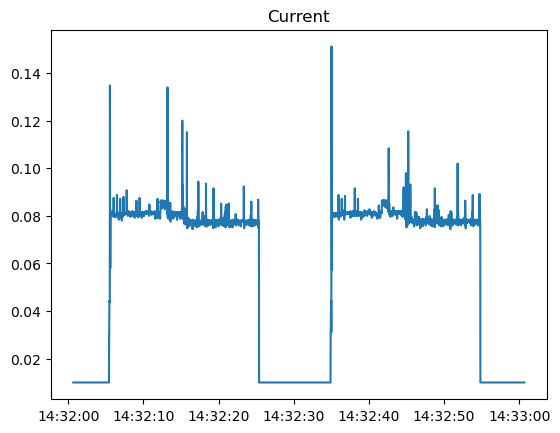

In [25]:
plt.plot(d.read_at, d.a)
plt.title("Current")

Text(0.5, 1.0, 'Voltage')

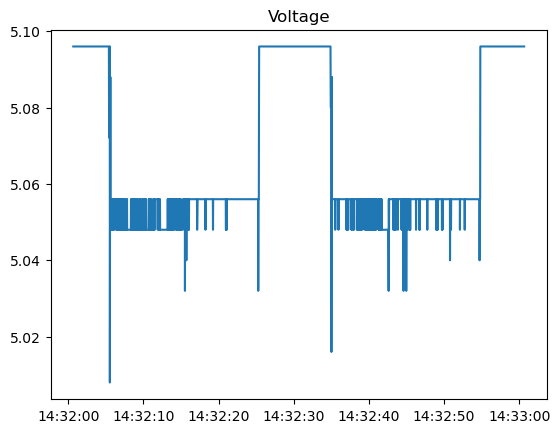

In [26]:
plt.plot(d.read_at, d.v)
plt.title("Voltage")

In [27]:
from scipy import integrate

time_data = (d.read_at - d.read_at.iloc[0]).dt.total_seconds()
current_data = d.a.to_numpy()
total_current = integrate.trapezoid(current_data, time_data)
total_current #A in timespan

np.float64(3.3806761317999996)

In [28]:
time_span = max(time_data)
time_span #seg

59.992301

In [29]:
avg_current = total_current / time_span
avg_current #A

np.float64(0.05635183307604754)

## Expected runtime using batteries

In [38]:
for bat_usable_cap in batteries: #Amp hour
    runtime = bat_usable_cap / avg_current
    print(f"At {bat_usable_cap:.02f}Ah:\t{runtime:.01f} hours,\t{runtime/24:.02f} days")

At 0.80Ah:	14.2 hours,	0.59 days
At 2.00Ah:	35.5 hours,	1.48 days
At 4.00Ah:	71.0 hours,	2.96 days
At 10.00Ah:	177.5 hours,	7.39 days
